In [1]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2

injections0 = pickle.load(open("O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)

posterior_dict = pickle.load(open("posterior_dict.pkl", "rb"))

print(f"using {len(posterior_dict)} events")


using 69 events


In [2]:
population_model = "PBH-lognormal"
cosmology_model = 'flatLCDM'
outdir = f'H0_GWTC-3_{population_model}_{cosmology_model}/'
injections.update_cut(snr_cut=9, ifar_cut=0) # We are going to update the injections with the new SNR cut to 12

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [3]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
from bilby.core.prior import Uniform
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315

prior_dict


{'mc': Uniform(minimum=5.0, maximum=50.0, name='$M_c$', latex_label='$M_c$', unit=None, boundary=None),
 'σc': Uniform(minimum=0.1, maximum=2, name='$\\sigma_c$', latex_label='$\\sigma_c$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

18:19 bilby INFO    : Running for label 'dynesty', output will be saved to 'H0_GWTC-3_PBH-lognormal_flatLCDM/'
18:19 bilby INFO    : Search parameters:
18:19 bilby INFO    :   mc = Uniform(minimum=5.0, maximum=50.0, name='$M_c$', latex_label='$M_c$', unit=None, boundary=None)
18:19 bilby INFO    :   σc = Uniform(minimum=0.1, maximum=2, name='$\\sigma_c$', latex_label='$\\sigma_c$', unit=None, boundary=None)
18:19 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None)
18:19 bilby INFO    :   H0 = 67.4
18:19 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


18:20 bilby INFO    : Single likelihood evaluation took 7.884e-02 s


0it [00:00, ?it/s]

18:20 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 32, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f8a47763460>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
18:20 bilby INFO    : Checkpoint every check_point_delta_t = 60s
18:20 bilby INFO    : Using dynesty version 1.0.1
18:20 bilby INFO    : Using the bilby-implemented rwalk sampl

85it [01:20,  2.19it/s, bound:0 nc:  1 ncall:6.0e+02 eff:14.2% logz=-155098.97+/-0.17 dlogz:153875.025>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


111it [01:20,  3.45it/s, bound:0 nc:  1 ncall:6.3e+02 eff:17.6% logz=-99779.67+/-0.17 dlogz:99677.451>0.1] 

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


139it [01:20,  5.32it/s, bound:0 nc:  2 ncall:6.6e+02 eff:21.0% logz=-49590.03+/-0.17 dlogz:48714.042>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


164it [01:21,  7.53it/s, bound:0 nc:  1 ncall:6.9e+02 eff:23.7% logz=-30114.85+/-0.17 dlogz:28779.685>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


245it [01:22, 19.63it/s, bound:0 nc:  1 ncall:8.2e+02 eff:29.8% logz=-9249.76+/-0.17 dlogz:7514.352>0.1]  

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


323it [01:24, 36.67it/s, bound:0 nc:  1 ncall:9.5e+02 eff:34.0% logz=-3922.32+/-0.17 dlogz:2165.557>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


412it [01:26, 39.65it/s, bound:0 nc:  4 ncall:1.1e+03 eff:36.0% logz=-2447.01+/-0.18 dlogz:703.024>0.1] 

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


517it [01:30, 31.74it/s, bound:0 nc:  7 ncall:1.5e+03 eff:35.3% logz=-2103.45+/-0.15 dlogz:348.196>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


654it [01:34, 25.86it/s, bound:0 nc:  4 ncall:1.9e+03 eff:34.8% logz=-2004.35+/-0.16 dlogz:254.776>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


751it [01:39, 17.66it/s, bound:0 nc:  5 ncall:2.3e+03 eff:32.2% logz=-1949.74+/-0.16 dlogz:199.788>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


772it [01:41, 10.95it/s, bound:0 nc: 14 ncall:2.5e+03 eff:31.0% logz=-1939.75+/-0.16 dlogz:189.750>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


814it [01:44, 15.58it/s, bound:0 nc: 10 ncall:2.7e+03 eff:30.0% logz=-1926.69+/-0.15 dlogz:176.705>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


817it [01:44, 13.47it/s, bound:0 nc:  7 ncall:2.7e+03 eff:29.8% logz=-1924.94+/-0.16 dlogz:175.004>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


918it [01:51, 12.33it/s, bound:0 nc:  8 ncall:3.4e+03 eff:27.1% logz=-1889.45+/-0.16 dlogz:139.196>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


932it [01:53, 12.06it/s, bound:0 nc: 12 ncall:3.5e+03 eff:26.8% logz=-1884.50+/-0.15 dlogz:134.001>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


997it [01:57, 14.79it/s, bound:0 nc:  5 ncall:3.9e+03 eff:25.8% logz=-1868.17+/-0.15 dlogz:117.538>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


1020it [01:58, 16.08it/s, bound:0 nc:  4 ncall:4.0e+03 eff:25.6% logz=-1861.80+/-0.15 dlogz:111.120>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


1031it [02:00,  9.91it/s, bound:0 nc: 14 ncall:4.1e+03 eff:25.0% logz=-1859.37+/-0.15 dlogz:108.753>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


1072it [02:04, 10.35it/s, bound:0 nc:  5 ncall:4.5e+03 eff:23.6% logz=-1850.43+/-0.15 dlogz:99.581>0.1] 

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


1087it [02:06, 10.66it/s, bound:0 nc: 15 ncall:4.7e+03 eff:23.3% logz=-1848.98+/-0.14 dlogz:98.067>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


1103it [02:08,  6.65it/s, bound:0 nc: 31 ncall:4.9e+03 eff:22.6% logz=-1846.74+/-0.15 dlogz:95.842>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


1127it [02:11,  9.62it/s, bound:0 nc: 24 ncall:5.1e+03 eff:22.0% logz=-1843.58+/-0.15 dlogz:92.607>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


1129it [02:11,  8.38it/s, bound:0 nc: 15 ncall:5.2e+03 eff:21.9% logz=-1843.34+/-0.15 dlogz:92.369>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


1187it [02:18,  9.13it/s, bound:0 nc: 16 ncall:5.7e+03 eff:20.8% logz=-1835.53+/-0.15 dlogz:84.431>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


1256it [02:27, 10.76it/s, bound:0 nc: 11 ncall:6.5e+03 eff:19.3% logz=-1826.50+/-0.15 dlogz:75.224>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log
18:22 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1275it [02:31,  6.87it/s, bound:0 nc: 19 ncall:6.8e+03 eff:18.9% logz=-1824.60+/-0.15 dlogz:73.313>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


1323it [02:37,  8.00it/s, bound:0 nc:  4 ncall:7.3e+03 eff:18.1% logz=-1820.17+/-0.15 dlogz:68.751>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


1337it [02:39,  8.83it/s, bound:0 nc: 17 ncall:7.5e+03 eff:17.9% logz=-1819.29+/-0.14 dlogz:67.839>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


1461it [02:58,  5.33it/s, bound:0 nc: 17 ncall:9.2e+03 eff:15.9% logz=-1810.52+/-0.15 dlogz:58.825>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


1608it [03:37,  2.27it/s, bound:0 nc: 75 ncall:1.3e+04 eff:12.7% logz=-1802.31+/-0.15 dlogz:50.306>0.1]

18:23 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1629it [03:45,  2.94it/s, bound:0 nc: 59 ncall:1.3e+04 eff:12.3% logz=-1801.31+/-0.15 dlogz:49.269>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:82: RuntimeWarning: divide by zero encountered in log


1784it [04:48,  1.98s/it, bound:1 nc: 45 ncall:1.8e+04 eff:10.0% logz=-1793.89+/-0.15 dlogz:41.523>0.1]

18:24 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2027it [05:57,  3.54it/s, bound:23 nc: 21 ncall:2.5e+04 eff:8.1% logz=-1786.04+/-0.15 dlogz:33.848>0.1]

18:25 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2235it [06:58,  3.31it/s, bound:42 nc: 63 ncall:3.1e+04 eff:7.2% logz=-1779.71+/-0.15 dlogz:27.094>0.1]

18:26 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2436it [08:06,  2.92it/s, bound:63 nc: 33 ncall:3.8e+04 eff:6.5% logz=-1775.45+/-0.16 dlogz:22.427>0.1]

18:28 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2608it [09:10,  2.66it/s, bound:83 nc: 36 ncall:4.4e+04 eff:5.9% logz=-1772.50+/-0.16 dlogz:19.328>0.1]

18:29 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2788it [10:20,  2.54it/s, bound:105 nc: 40 ncall:5.1e+04 eff:5.5% logz=-1769.71+/-0.16 dlogz:16.183>0.1]

18:30 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2938it [11:23,  2.42it/s, bound:124 nc: 73 ncall:5.7e+04 eff:5.1% logz=-1767.43+/-0.16 dlogz:13.860>0.1]

18:31 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3093it [12:27,  2.44it/s, bound:144 nc: 40 ncall:6.4e+04 eff:4.9% logz=-1765.51+/-0.17 dlogz:11.620>0.1]

18:32 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3247it [13:31,  2.43it/s, bound:164 nc: 40 ncall:7.0e+04 eff:4.6% logz=-1763.92+/-0.17 dlogz:9.722>0.1] 

18:33 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3405it [14:35,  2.49it/s, bound:184 nc: 40 ncall:7.6e+04 eff:4.5% logz=-1762.58+/-0.17 dlogz:8.145>0.1]

18:34 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3551it [15:39,  2.31it/s, bound:204 nc: 40 ncall:8.3e+04 eff:4.3% logz=-1761.50+/-0.17 dlogz:6.777>0.1]

18:35 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3706it [16:43,  2.40it/s, bound:224 nc: 40 ncall:8.9e+04 eff:4.2% logz=-1760.52+/-0.17 dlogz:5.487>0.1]

18:36 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3855it [17:48,  2.32it/s, bound:244 nc: 40 ncall:9.5e+04 eff:4.0% logz=-1759.81+/-0.17 dlogz:4.487>0.1]

18:37 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
18:37 bilby INFO    : Writing 105 current samples to H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4003it [18:52,  2.30it/s, bound:264 nc: 40 ncall:1.0e+05 eff:3.9% logz=-1759.24+/-0.17 dlogz:3.639>0.1]

18:38 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
18:38 bilby INFO    : Writing 136 current samples to H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4155it [19:57,  2.35it/s, bound:283 nc: 80 ncall:1.1e+05 eff:3.8% logz=-1758.78+/-0.17 dlogz:2.906>0.1]

18:39 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
18:39 bilby INFO    : Writing 183 current samples to H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4308it [21:02,  2.41it/s, bound:303 nc: 40 ncall:1.1e+05 eff:3.8% logz=-1758.41+/-0.17 dlogz:2.282>0.1]

18:41 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
18:41 bilby INFO    : Writing 240 current samples to H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4462it [22:06,  2.43it/s, bound:323 nc: 40 ncall:1.2e+05 eff:3.7% logz=-1758.11+/-0.17 dlogz:1.755>0.1]

18:42 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
18:42 bilby INFO    : Writing 316 current samples to H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4615it [23:10,  2.41it/s, bound:343 nc: 40 ncall:1.3e+05 eff:3.6% logz=-1757.87+/-0.17 dlogz:1.329>0.1]

18:43 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
18:43 bilby INFO    : Writing 435 current samples to H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4766it [24:14,  2.34it/s, bound:363 nc: 40 ncall:1.3e+05 eff:3.6% logz=-1757.68+/-0.18 dlogz:1.025>0.1]

18:44 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
18:44 bilby INFO    : Writing 561 current samples to H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4921it [25:19,  2.41it/s, bound:383 nc: 40 ncall:1.4e+05 eff:3.5% logz=-1757.53+/-0.18 dlogz:0.754>0.1]

18:45 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
18:45 bilby INFO    : Writing 770 current samples to H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5074it [26:24,  2.40it/s, bound:403 nc: 40 ncall:1.5e+05 eff:3.5% logz=-1757.41+/-0.18 dlogz:0.552>0.1]

18:46 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
18:46 bilby INFO    : Writing 1035 current samples to H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5225it [27:28,  2.35it/s, bound:422 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1757.32+/-0.18 dlogz:0.405>0.1]

18:47 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
18:47 bilby INFO    : Writing 1366 current samples to H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5376it [28:33,  2.39it/s, bound:442 nc: 40 ncall:1.6e+05 eff:3.4% logz=-1757.25+/-0.18 dlogz:0.297>0.1]

18:48 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
18:48 bilby INFO    : Writing 1648 current samples to H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5529it [29:38,  2.43it/s, bound:462 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1757.20+/-0.18 dlogz:0.217>0.1]

18:49 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
18:49 bilby INFO    : Writing 1633 current samples to H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5682it [30:43,  2.42it/s, bound:482 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1757.16+/-0.18 dlogz:0.158>0.1]

18:50 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
18:50 bilby INFO    : Writing 1630 current samples to H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5836it [31:48,  2.38it/s, bound:502 nc: 40 ncall:1.8e+05 eff:3.3% logz=-1757.13+/-0.18 dlogz:0.115>0.1]

18:51 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
18:51 bilby INFO    : Writing 1587 current samples to H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5894it [32:15,  2.18it/s, bound:510 nc: 40 ncall:1.8e+05 eff:3.3% logz=-1757.12+/-0.18 dlogz:0.102>0.1]

18:52 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
18:52 bilby INFO    : Writing 1602 current samples to H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
18:52 bilby INFO    : Starting to close worker pool.
18:52 bilby INFO    : Finished closing worker pool.


5904it [32:18,  3.05it/s, bound:511 nc:  1 ncall:1.8e+05 eff:3.5% logz=-1757.03+/-0.18 dlogz:0.000>0.1]



18:52 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
18:52 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
18:52 bilby INFO    : Sampling time: 0:30:57.191883
18:52 bilby INFO    : Summary of results:
nsamples: 6404
ln_noise_evidence:    nan
ln_evidence: -1757.028 +/-  0.181
ln_bayes_factor:    nan +/-  0.181



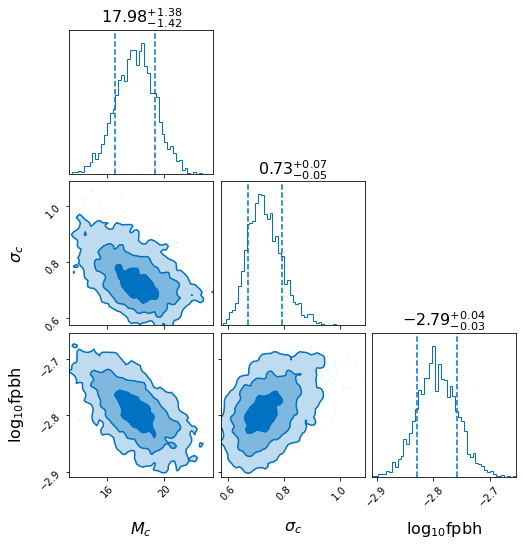

In [4]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=32, parallel=2000, check_point_delta_t=60)
result.plot_corner()
